In [2]:
import os
import sys
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#root_chwd = os.getcwd()
root_chwd=r'C:\Users\Egon\Desktop\Universita\SecondoSemestre\StatLearning\progetto\prog'

In [24]:
for (dirpath, dirnames, filenames) in os.walk(root_chwd): 
    print(dirpath, dirnames)
    experiments=dirnames
    break
print(experiments)
for experiment in experiments:
    chwd=root_chwd+'\\'+ experiment
    print(chwd)

C:\Users\Egon\Desktop\Universita\SecondoSemestre\StatLearning\progetto\prog ['casa claudio', 'casa egon', 'casa lorenzo', 'metro claudio', 'metro egon', 'metro lorenzo', 'strada claudio', 'strada egon', 'strada lorenzo']
['casa claudio', 'casa egon', 'casa lorenzo', 'metro claudio', 'metro egon', 'metro lorenzo', 'strada claudio', 'strada egon', 'strada lorenzo']
C:\Users\Egon\Desktop\Universita\SecondoSemestre\StatLearning\progetto\prog\casa claudio
C:\Users\Egon\Desktop\Universita\SecondoSemestre\StatLearning\progetto\prog\casa egon
C:\Users\Egon\Desktop\Universita\SecondoSemestre\StatLearning\progetto\prog\casa lorenzo
C:\Users\Egon\Desktop\Universita\SecondoSemestre\StatLearning\progetto\prog\metro claudio
C:\Users\Egon\Desktop\Universita\SecondoSemestre\StatLearning\progetto\prog\metro egon
C:\Users\Egon\Desktop\Universita\SecondoSemestre\StatLearning\progetto\prog\metro lorenzo
C:\Users\Egon\Desktop\Universita\SecondoSemestre\StatLearning\progetto\prog\strada claudio
C:\Users\Ego

In [35]:
i=1

In [43]:
final_df=pd.DataFrame(columns=['location', 'guy', 'sensor', *range(200)])
for experiment in experiments:
    utility_info = experiment.split() #get the location and the guy
    location = utility_info[0]
    guy = utility_info[1]
    chwd=root_chwd+'\\'+ experiment #enter in the experiment folder
    for (dirpath, dirnames, filenames) in os.walk(chwd):
        for file in filenames: #pick the files
            df = pd.read_csv(dirpath+'/'+file) #read the frame
            for col in df:
                kwargs = {col:df[col].interpolate(method='slinear')} #fill the nan with the interpolations
                df = df.assign(**kwargs)
            df = df.iloc[100:300] #sega i valori tra 100 e 300
            if file=='casa egon Registrazione 8.csv' :
                my=df.DecibelSource
                print('ok')
            df.reset_index(inplace = True)
            for sensor in df: 
                if (len([location, guy, sensor, *list(df[sensor])]))==203 and sensor not in ['timestamp', 'index']:
                    final_df = final_df.append(pd.Series([location, guy, sensor, *list(df[sensor])], index=final_df.columns ), ignore_index=True)
                if (len([location, guy, sensor, *list(df[sensor])]))!=203  and sensor not in ['timestamp', 'index']:
                    print('failed', file, sensor)

ok


KeyboardInterrupt: 

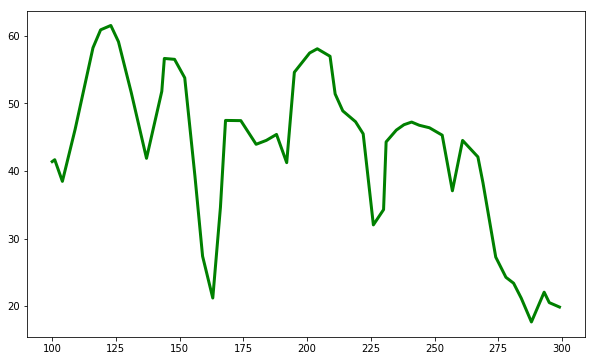

In [56]:
plt.subplots(figsize=(10, 6))
plt.plot(my, color='green', linewidth=3)

In [10]:
len(final_df.loc[final_df["guy"]=="egon"])

600

In [11]:
final_df.to_csv('final.csv')